In [ ]:
import pandas as pd
import os
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


path = r'C:\Users\moham\Apriori_VS_Word2Vec'
excel_file = 'Assignment-1_Data.xlsx'
excel_file_path = os.path.join(path, excel_file)



def load_dataset(file_path):
    return pd.read_excel(file_path)
    

data_excel = load_dataset(excel_file_path)
data_excel.dropna(subset=['Itemname'], inplace=True) 

num_unique_items = data_excel['Itemname'].nunique()
num_unique_items



4185

In [45]:
unique_items_df = pd.DataFrame({'unique_items': data_excel['Itemname'].unique()})
unique_items_df.to_excel('unique_items.xlsx', index=False)

In [ ]:


basket = data_excel.groupby('BillNo')['Itemname'].apply(list)


print("First few rows of the Excel dataset:")
print(data_excel.head())
print("\nDetailed information about the DataFrame:")
data_excel.info()


First few rows of the Excel dataset:
   BillNo                             Itemname  Quantity                Date  \
0  536365   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00   
1  536365                  WHITE METAL LANTERN         6 2010-12-01 08:26:00   
2  536365       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00   
3  536365  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00   
4  536365       RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01 08:26:00   

   Price  CustomerID         Country  
0   2.55     17850.0  United Kingdom  
1   3.39     17850.0  United Kingdom  
2   2.75     17850.0  United Kingdom  
3   3.39     17850.0  United Kingdom  
4   3.39     17850.0  United Kingdom  

Detailed information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 520609 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0

In [ ]:

te = TransactionEncoder()
te_ary = te.fit(basket).transform(basket)
print(te_ary)   
basket_encoded = pd.DataFrame(te_ary, columns=te.columns_)
print(basket.head())

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
BillNo
536365    [WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...
536366    [HAND WARMER UNION JACK, HAND WARMER RED POLKA...
536367    [ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO...
536368    [JAM MAKING SET WITH JARS, RED COAT RACK PARIS...
536369                           [BATH BUILDING BLOCK WORD]
Name: Itemname, dtype: object


In [28]:

frequent_itemsets = apriori(basket_encoded, min_support=0.01, use_colnames=True) # test support = 0.01
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)

In [21]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

In [29]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))


In [23]:
rules[ (rules['antecedent_len'] >= 2) &
       (rules['confidence'] > 0.75) &
       (rules['lift'] > 1.2) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len
1558,"(ALARM CLOCK BAKELIKE CHOCOLATE, ALARM CLOCK B...",(ALARM CLOCK BAKELIKE RED),0.013559,0.050821,0.010986,0.810219,15.942459,0.010297,5.001441,0.950158,2
1560,"(ALARM CLOCK BAKELIKE CHOCOLATE, ALARM CLOCK B...",(ALARM CLOCK BAKELIKE GREEN),0.014054,0.047852,0.010986,0.781690,16.335465,0.010313,4.361451,0.952165,2
1564,"(ALARM CLOCK BAKELIKE IVORY, ALARM CLOCK BAKEL...",(ALARM CLOCK BAKELIKE RED),0.016330,0.050821,0.012718,0.778788,15.323998,0.011888,4.290807,0.950261,2
1570,"(ALARM CLOCK BAKELIKE ORANGE, ALARM CLOCK BAKE...",(ALARM CLOCK BAKELIKE RED),0.013312,0.050821,0.010144,0.762082,14.995276,0.009468,3.989516,0.945904,2
1582,"(CHARLOTTE BAG PINK POLKADOT, CHARLOTTE BAG AP...",(RED RETROSPOT CHARLOTTE BAG),0.012322,0.050871,0.010590,0.859438,16.894473,0.009963,6.752375,0.952546,2
...,...,...,...,...,...,...,...,...,...,...,...
2976,"(CHARLOTTE BAG PINK POLKADOT, STRAWBERRY CHARL...",(CHARLOTTE BAG SUKI DESIGN),0.011926,0.043300,0.010046,0.842324,19.453344,0.009529,6.067494,0.960044,4
2977,"(WOODLAND CHARLOTTE BAG, STRAWBERRY CHARLOTTE ...",(CHARLOTTE BAG PINK POLKADOT),0.012767,0.036520,0.010046,0.786822,21.544841,0.009579,4.519596,0.965917,4
2978,"(CHARLOTTE BAG PINK POLKADOT, CHARLOTTE BAG SU...",(RED RETROSPOT CHARLOTTE BAG),0.010936,0.050871,0.010046,0.918552,18.056517,0.009489,11.653196,0.955063,4
2986,"(CHARLOTTE BAG PINK POLKADOT, CHARLOTTE BAG SU...","(WOODLAND CHARLOTTE BAG, RED RETROSPOT CHARLOT...",0.013361,0.024891,0.010046,0.751852,30.205611,0.009713,3.929543,0.979987,3


In [31]:
if 'antecedent support' in rules.columns:
    rules['coverage'] = rules['antecedent support']
else:
    rules['coverage'] = rules['support'] / rules['confidence']

In [37]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len,coverage
0,(6 RIBBONS RUSTIC CHARM),(JAM MAKING SET PRINTED),0.046615,0.055226,0.011530,0.247346,4.478826,0.008956,1.255257,0.814705,1,0.046615
1,(JAM MAKING SET PRINTED),(6 RIBBONS RUSTIC CHARM),0.055226,0.046615,0.011530,0.208781,4.478826,0.008956,1.204957,0.822130,1,0.055226
2,(6 RIBBONS RUSTIC CHARM),(JAM MAKING SET WITH JARS),0.046615,0.053890,0.010095,0.216561,4.018599,0.007583,1.207637,0.787884,1,0.046615
3,(JAM MAKING SET WITH JARS),(6 RIBBONS RUSTIC CHARM),0.053890,0.046615,0.010095,0.187328,4.018599,0.007583,1.173148,0.793942,1,0.053890
4,(6 RIBBONS RUSTIC CHARM),(JUMBO BAG RED RETROSPOT),0.046615,0.102138,0.010689,0.229299,2.245001,0.005928,1.164995,0.581681,1,0.046615
...,...,...,...,...,...,...,...,...,...,...,...,...
2999,(RED RETROSPOT CHARLOTTE BAG),"(CHARLOTTE BAG PINK POLKADOT, CHARLOTTE BAG SU...",0.050871,0.010936,0.010046,0.197471,18.056517,0.009489,1.232433,0.995248,1,0.050871
3000,(CHARLOTTE BAG PINK POLKADOT),"(WOODLAND CHARLOTTE BAG, STRAWBERRY CHARLOTTE ...",0.036520,0.012767,0.010046,0.275068,21.544841,0.009579,1.361828,0.989730,1,0.036520
3001,(CHARLOTTE BAG SUKI DESIGN),"(CHARLOTTE BAG PINK POLKADOT, STRAWBERRY CHARL...",0.043300,0.011926,0.010046,0.232000,19.453344,0.009529,1.286555,0.991528,1,0.043300
3002,(WOODLAND CHARLOTTE BAG),"(CHARLOTTE BAG PINK POLKADOT, STRAWBERRY CHARL...",0.040924,0.012074,0.010046,0.245466,20.329375,0.009551,1.309318,0.991382,1,0.040924


In [35]:
covered_transactions = set()   
basket_list = basket.tolist()       
for tx_idx, transaction in enumerate(basket_list):
   
    tx_set = set(transaction)

   
    for _, rule_row in rules.iterrows():
       
        if rule_row['antecedents'].issubset(tx_set):
            covered_transactions.add(tx_idx)
            break 

overall_coverage = len(covered_transactions) / len(basket_list)

In [36]:
overall_coverage

0.826949722882027

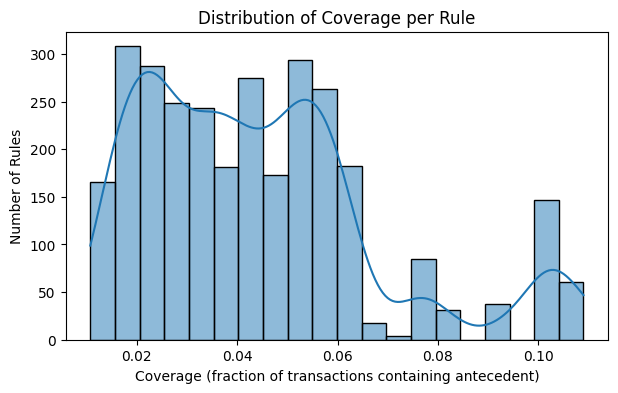

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(7, 4))
sns.histplot(rules['coverage'], bins=20, kde=True)  
plt.title("Distribution of Coverage per Rule")
plt.xlabel("Coverage (fraction of transactions containing antecedent)")
plt.ylabel("Number of Rules")
plt.show()


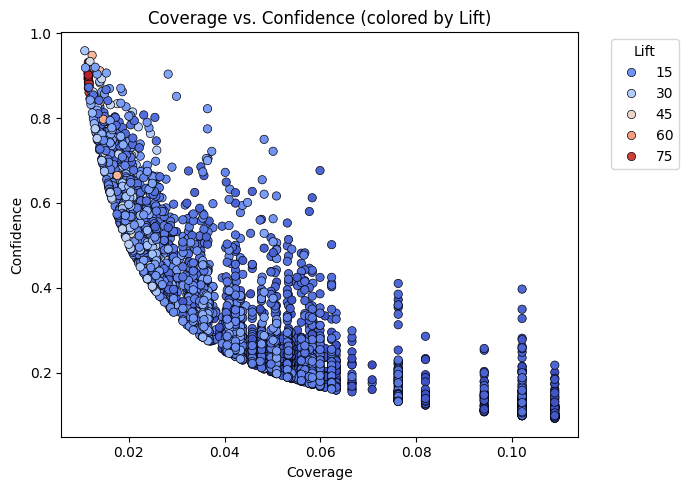

In [39]:
plt.figure(figsize=(7, 5))
scatter = sns.scatterplot(
    data=rules,
    x='coverage',
    y='confidence',
    hue='lift',       
    palette='coolwarm',
    edgecolor='black'
)

plt.title("Coverage vs. Confidence (colored by Lift)")
plt.xlabel("Coverage")
plt.ylabel("Confidence")
plt.legend(title="Lift", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


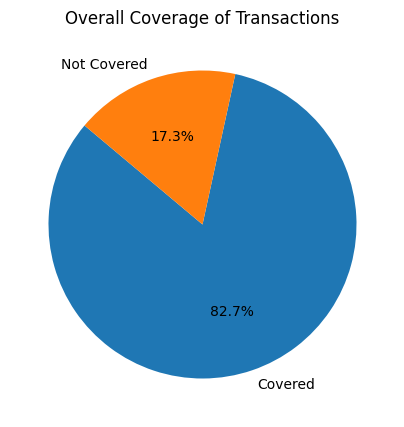

In [40]:
covered_count = int(overall_coverage * len(basket_list))
not_covered_count = len(basket_list) - covered_count

labels = ['Covered', 'Not Covered']
sizes = [covered_count, not_covered_count]

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Overall Coverage of Transactions")
plt.show()
